<a href="https://colab.research.google.com/github/A-Anirudh/Number-Recognition/blob/main/CMRIT_Project_semester_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-379a318e-2bda-b7a5-602c-563a1d5c5238)


In [30]:
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-01-15 10:13:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-01-15 10:13:33 (83.0 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [31]:
from helper_functions import plot_loss_curves,make_confusion_matrix,create_tensorboard_callback

In [32]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
class_names = [0,1,2,3,4,5,6,7,8,9]

In [33]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 2

In [34]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

28419
8


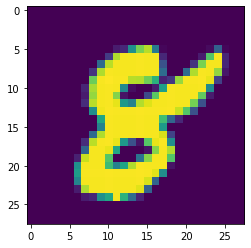

In [35]:
# Plot a single example
import matplotlib.pyplot as plt
import random
i = random.randint(0,60000)
print(i)
plt.imshow(train_data[i]);
print(train_labels[i])

In [36]:
# Normalizing our data

test_data_normalized = test_data/255.

train_data_normalized = train_data/255.

In [37]:
train_labels[0]

5

In [38]:
test_data_normalized[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [50]:
# Building the model

tf.random.set_seed(42)

model_0 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)), # Input layer
      tf.keras.layers.Dense(10,activation='relu'), # Hidden layer
      tf.keras.layers.Dense(10,activation='relu'), # Hidden layer
      tf.keras.layers.Dense(10,activation='softmax'), # Output layer
])

model_0.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

history_0 = model_0.fit(train_data_normalized,train_labels, epochs=50,validation_data=(test_data_normalized, test_labels), callbacks=[create_tensorboard_callback(dir_name='number_detection', experiment_name='Number detection')])

Saving TensorBoard log files to: number_detection/Number detection/20220115-101702
Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5723 - accuracy: 0.8271 - val_loss: 0.3173 - val_accuracy: 0.9049
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2957 - accuracy: 0.9148 - val_loss: 0.2733 - val_accuracy: 0.9219
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2634 - accuracy: 0.9251 - val_loss: 0.2521 - val_accuracy: 0.9267
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2454 - accuracy: 0.9301 - val_loss: 0.2493 - val_accuracy: 0.9277
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2339 - accuracy: 0.9335 - val_loss: 0.2505 - val_accuracy: 0.9302
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2244 - accuracy: 0.9357 - val_loss: 0.2306 - val_accuracy: 0.9338
Epoch 7/50
1875/1875 [==============================]

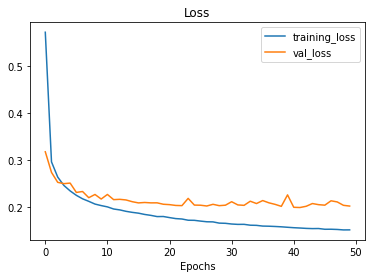

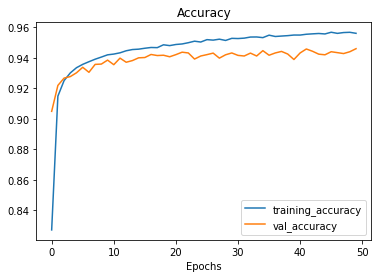

In [40]:
plot_loss_curves(history_0)

In [41]:
 import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

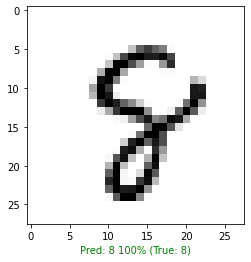

In [42]:
plot_random_image(model_0,images=test_data, 
                  true_labels=test_labels, classes=class_names)

In [43]:
# Make predictions with the most recent model
y_probs = model_0.predict(test_data) # "probs" is short for probabilities


In [44]:
y_preds = y_probs.argmax(axis=1)

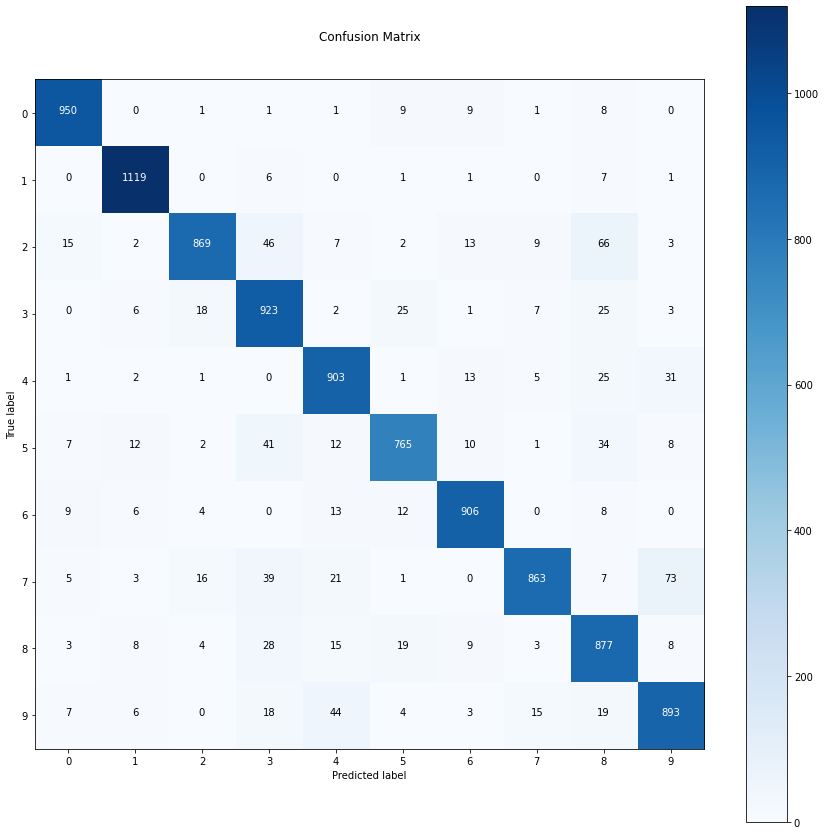

In [45]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [48]:
!tensorboard dev upload --logdir ./number_detection \
    --name "Number detection with TensorFlow" \
    --description "A ML model to detect the number written on an image using TensorFlow Sequential model" \
    --one_shot


New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/sreY9QJgTzeIZD3oma0QRQ/

[2022-01-15T10:15:33] Started scanning logdir.
[2022-01-15T10:15:35] Total uploaded: 306 scalars, 0 tensors, 2 binary objects (67.0 kB)
[2022-01-15T10:15:35] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/sreY9QJgTzeIZD3oma0QRQ/
